Exploring Ensemble Methods

In [ ]:
pip install turicreate

Fire up Turi Create

In [4]:
import turicreate

Load LendingClub dataset

In [5]:
loans = turicreate.SFrame('/content/drive/My Drive/lending-club-data.sframe/')
loans

id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade
1077501,1296599,5000,5000,4975,36 months,10.65,162.87,B,B2
1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,C4
1077175,1313524,2400,2400,2400,36 months,15.96,84.33,C,C5
1076863,1277178,10000,10000,10000,36 months,13.49,339.31,C,C1
1075269,1311441,5000,5000,5000,36 months,7.9,156.46,A,A4
1072053,1288686,3000,3000,3000,36 months,18.64,109.43,E,E1
1071795,1306957,5600,5600,5600,60 months,21.28,152.39,F,F2
1071570,1306721,5375,5375,5350,60 months,12.69,121.45,B,B5
1070078,1305201,6500,6500,6500,60 months,14.65,153.45,C,C3
1069908,1305008,12000,12000,12000,36 months,12.69,402.54,B,B5


In [6]:
loans['safe_loans'] = loans['bad_loans'].apply(lambda x: +1 if x == 0 else -1)
loans = loans.remove_column('bad_loans')

In [7]:
loans['safe_loans']

dtype: int
Rows: 122607
[1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, ... ]

Selecting features

In [8]:
target = 'safe_loans'
features = ['grade',                     # grade of the loan (categorical)
            'sub_grade_num',             # sub-grade of the loan as a number from 0 to 1
            'short_emp',                 # one year or less of employment
            'emp_length_num',            # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'payment_inc_ratio',         # ratio of the monthly payment to income
            'delinq_2yrs',               # number of delinquincies 
            'delinq_2yrs_zero',          # no delinquincies in last 2 years
            'inq_last_6mths',            # number of creditor inquiries in last 6 months
            'last_delinq_none',          # has borrower had a delinquincy
            'last_major_derog_none',     # has borrower had 90 day or worse rating
            'open_acc',                  # number of open credit accounts
            'pub_rec',                   # number of derogatory public records
            'pub_rec_zero',              # no derogatory public records
            'revol_util',                # percent of available credit being used
            'total_rec_late_fee',        # total late fees received to day
            'int_rate',                  # interest rate of the loan
            'total_rec_int',             # interest received to date
            'annual_inc',                # annual income of borrower
            'funded_amnt',               # amount committed to the loan
            'funded_amnt_inv',           # amount committed by investors for the loan
            'installment',               # monthly payment owed by the borrower
           ]

Skipping observations with missing values

In [11]:
loans, loans_with_na = loans[[target] + features].dropna_split()

# Count the number of rows with missing data
num_rows_with_na = loans_with_na.num_rows()
num_rows = loans.num_rows()
print('Dropping %s observations; keeping %s ' % (num_rows_with_na, num_rows))

Dropping 29 observations; keeping 122578 


Make sure the classes are balanced

In [13]:
safe_loans_raw = loans[loans[target] == 1]
risky_loans_raw = loans[loans[target] == -1]

# Undersample the safe loans.
percentage = len(risky_loans_raw)/float(len(safe_loans_raw))
safe_loans = safe_loans_raw.sample(percentage, seed = 1)
risky_loans = risky_loans_raw
loans_data = risky_loans.append(safe_loans)

print("Percentage of safe loans                 :", len(safe_loans) / float(len(loans_data)))
print("Percentage of risky loans                :", len(risky_loans) / float(len(loans_data)))
print("Total number of loans in our new dataset :", len(loans_data))

Percentage of safe loans                 : 0.5022471668494506
Percentage of risky loans                : 0.4977528331505494
Total number of loans in our new dataset : 46503


Split data into training and validation sets

In [14]:
train_data, validation_data = loans_data.random_split(.8, seed=1)

Gradient boosted tree classifier

In [15]:
model_5 = turicreate.boosted_trees_classifier.create(train_data, validation_set=None, 
        target = target, features = features, max_iterations = 5)

Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 37219

Number of classes           : 2

Number of feature columns   : 24

Number of unpacked features : 24

+-----------+--------------+-------------------+-------------------+

| Iteration | Elapsed Time | Training Accuracy | Training Log Loss |

+-----------+--------------+-------------------+-------------------+

| 1         | 0.085981     | 0.657541          | 0.657139          |

| 2         | 0.160679     | 0.656976          | 0.636157          |

| 3         | 0.237458     | 0.664983          | 0.623206          |

| 4         | 0.311896     | 0.668476          | 0.613783          |

| 5         | 0.385984     | 0.673339          | 0.606229          |

+-----------+--------------+-------------------+-------------------+

Making predictions

In [16]:
# Select all positive and negative examples.
validation_safe_loans = validation_data[validation_data[target] == 1]
validation_risky_loans = validation_data[validation_data[target] == -1]

# Select 2 examples from the validation set for positive & negative loans
sample_validation_data_risky = validation_risky_loans[0:2]
sample_validation_data_safe = validation_safe_loans[0:2]

# Append the 4 examples into a single dataset
sample_validation_data = sample_validation_data_safe.append(sample_validation_data_risky)
sample_validation_data

Columns:
	safe_loans	int
	grade	str
	sub_grade_num	float
	short_emp	int
	emp_length_num	int
	home_ownership	str
	dti	float
	purpose	str
	payment_inc_ratio	float
	delinq_2yrs	int
	delinq_2yrs_zero	int
	inq_last_6mths	int
	last_delinq_none	int
	last_major_derog_none	int
	open_acc	int
	pub_rec	int
	pub_rec_zero	int
	revol_util	float
	total_rec_late_fee	float
	int_rate	float
	total_rec_int	float
	annual_inc	int
	funded_amnt	int
	funded_amnt_inv	int
	installment	float

Rows: 4

Data:
+------------+-------+---------------+-----------+----------------+----------------+
| safe_loans | grade | sub_grade_num | short_emp | emp_length_num | home_ownership |
+------------+-------+---------------+-----------+----------------+----------------+
|     1      |   B   |      0.2      |     0     |       3        |    MORTGAGE    |
|     1      |   B   |      0.6      |     1     |       1        |      RENT      |
|     -1     |   D   |      0.4      |     0     |       3        |      RENT      |
|     -1     |   A   |      1.0      |     0     |       11       |    MORTGAGE    |
+------------+-------+---------------+-----------+----------------+----------------+
+-------+--------------------+-------------------+-------------+------------------+
|  dti  |      purpose       | payment_inc_ratio | delinq_2yrs | delinq_2yrs_zero |
+-------+--------------------+-------------------+-------------+------------------+
| 29.44 |    credit_card     |      6.30496      |      0      |        1         |
| 12.19 |    credit_card     |      13.4952      |      0      |        1         |
| 13.97 |       other        |      2.96736      |      3      |        0         |
| 16.33 | debt_consolidation |      1.90524      |      0      |        1         |
+-------+--------------------+-------------------+-------------+------------------+
+----------------+------------------+-----------------------+----------+---------+
| inq_last_6mths | last_delinq_none | last_major_derog_none | open_acc | pub_rec |
+----------------+------------------+-----------------------+----------+---------+
|       0        |        1         |           1           |    8     |    0    |
|       0        |        1         |           1           |    8     |    0    |
|       0        |        0         |           1           |    14    |    0    |
|       0        |        1         |           1           |    17    |    0    |
+----------------+------------------+-----------------------+----------+---------+
+--------------+------------+--------------------+----------+-----+
| pub_rec_zero | revol_util | total_rec_late_fee | int_rate | ... |
+--------------+------------+--------------------+----------+-----+
|      1       |    93.9    |        0.0         |   9.91   | ... |
|      1       |    59.1    |        0.0         |  11.71   | ... |
|      1       |    59.5    |        0.0         |  16.77   | ... |
|      1       |    62.1    |        0.0         |   8.9    | ... |
+--------------+------------+--------------------+----------+-----+
[4 rows x 25 columns]

In [17]:
model_5.predict(sample_validation_data)

dtype: int
Rows: 4
[1, 1, -1, 1]

In [21]:
model_5.predict(sample_validation_data,output_type = 'probability')

dtype: float
Rows: 4
[0.7045905590057373, 0.5963408946990967, 0.44925159215927124, 0.6119099855422974]

Evaluating the model on the validation data

In [32]:
model_5.evaluate(validation_data)

{'accuracy': 0.66813873330461,
 'auc': 0.7247215702188436,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      -1      |        1        |  1618 |
 |      -1      |        -1       |  3054 |
 |      1       |        -1       |  1463 |
 |      1       |        1        |  3149 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.6715001599317625,
 'log_loss': 0.6176131769693957,
 'precision': 0.6605831760016782,
 'recall': 0.6827840416305291,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+-----+-----+------+------+
 | threshold | fpr | tpr |  p   |  n   |
 +-----------+-----+-----+------+------+
 |    0.0    | 1.0 | 1.0 | 4612 | 4672 |
 |   1e-05   | 1.0 | 1.0 | 4612 | 4672 |
 |   2e-05   | 1.0 | 

In [49]:
false_positive = 0
false_negative = 0
predictions  = model_5.predict(validation_data)
for i in range(len(validation_data)):
  if validation_data['safe_loans'][i] == -1 and predictions[i] == 1:
    false_positive += 1
  elif validation_data['safe_loans'][i] == 1 and predictions[i] == -1:
    false_negative += 1

Comparison with decision trees
In the earlier assignment, we saw that the prediction accuracy of the decision trees was around 0.64 (rounded). In this assignment, we saw that model_5 has an accuracy of 0.67 (rounded).

Here, we quantify the benefit of the extra 3% increase in accuracy of model_5 in comparison with a single decision tree from the original decision tree assignment.

As we explored in the earlier assignment, we calculated the cost of the mistakes made by the model. We again consider the same costs as follows:

False negatives: Assume a cost of $10,000 per false negative.
False positives: Assume a cost of $20,000 per false positive.
Assume that the number of false positives and false negatives for the learned decision tree was

False negatives: 1936
False positives: 1503
Using the costs defined above and the number of false positives and false negatives for the decision tree, we can calculate the total cost of the mistakes made by the decision tree model as follows:

cost = $10,000 * 1936  + $20,000 * 1503 = $49,420,000
The total cost of the mistakes of the model is $49.42M. That is a lot of money!.



In [52]:
cost = 20000 * false_positive + 10000 * false_negative
cost

46990000

Most positive & negative loans.
In this section, we will find the loans that are most likely to be predicted safe. We can do this in a few steps:

Step 1: Use the model_5 (the model with 5 trees) and make probability predictions for all the loans in the validation_data.
Step 2: Similar to what we did in the very first assignment, add the probability predictions as a column called predictions into the validation_data.
Step 3: Sort the data (in descreasing order) by the probability predictions.
Start here with Step 1 & Step 2. Make predictions using model_5 for examples in the validation_data. Use output_type = probability.

In [53]:
validation_data['prediction'] = model_5.predict(validation_data,output_type='probability')

In [58]:
validation_data.sort('prediction',ascending=False)

safe_loans,grade,sub_grade_num,short_emp,emp_length_num,home_ownership,dti,purpose,payment_inc_ratio
1,A,0.2,0,11,MORTGAGE,4.21,credit_card,0.955726
1,A,0.4,0,4,MORTGAGE,12.76,car,1.7376
1,A,0.6,0,11,MORTGAGE,2.4,car,2.49545
1,A,0.2,0,11,MORTGAGE,6.47,major_purchase,1.131
1,A,0.2,0,11,OWN,0.69,car,3.17372
1,A,0.6,0,5,MORTGAGE,5.2,major_purchase,0.74268
1,A,0.4,0,11,MORTGAGE,10.95,credit_card,3.02852
1,A,0.2,0,11,OWN,8.92,home_improvement,2.44751
1,A,0.2,0,6,MORTGAGE,10.29,home_improvement,3.22264
1,A,0.2,0,11,MORTGAGE,6.1,major_purchase,2.30678


In [59]:
validation_data.sort('prediction',ascending=True)

safe_loans,grade,sub_grade_num,short_emp,emp_length_num,home_ownership,dti,purpose
-1,D,0.8,0,3,RENT,8.95,small_business
-1,C,0.8,1,0,MORTGAGE,17.37,home_improvement
-1,B,1.0,0,5,RENT,29.42,debt_consolidation
-1,C,0.4,0,4,RENT,8.4,credit_card
-1,C,0.2,0,5,RENT,30.17,debt_consolidation
-1,F,0.2,0,2,MORTGAGE,11.12,car
-1,E,1.0,0,3,RENT,29.24,debt_consolidation
-1,E,0.2,0,11,MORTGAGE,14.93,debt_consolidation
-1,E,0.2,0,2,MORTGAGE,10.98,home_improvement
-1,C,0.6,0,11,MORTGAGE,9.04,debt_consolidation


Effect of adding more trees

In [60]:
model_10 = turicreate.boosted_trees_classifier.create(train_data, validation_set=None, 
        target = target, features = features, max_iterations = 10, verbose=False)

In [61]:
model_50 = turicreate.boosted_trees_classifier.create(train_data, validation_set=None, 
        target = target, features = features, max_iterations = 50, verbose=False)

In [62]:
model_100 = turicreate.boosted_trees_classifier.create(train_data, validation_set=None, 
        target = target, features = features, max_iterations = 100, verbose=False)

In [63]:
model_200 = turicreate.boosted_trees_classifier.create(train_data, validation_set=None, 
        target = target, features = features, max_iterations = 200, verbose=False)

In [64]:
model_500 = turicreate.boosted_trees_classifier.create(train_data, validation_set=None, 
        target = target, features = features, max_iterations = 500, verbose=False)

In [71]:
value = model_10.evaluate(validation_data)
value['accuracy']


0.6727703576044808

In [73]:
value_1= model_50.evaluate(validation_data)
value_1['accuracy']

0.6907582938388626

In [74]:
value_2= model_100.evaluate(validation_data)
value_2['accuracy']


0.6917277035760449

In [75]:
value_3= model_200.evaluate(validation_data)
value_3['accuracy']

0.684510986643688

In [76]:
value_4= model_500.evaluate(validation_data)
value_4['accuracy']

0.6718009478672986

Plot the training and validation error vs. number of trees

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline
def make_figure(dim, title, xlabel, ylabel, legend):
    plt.rcParams['figure.figsize'] = dim
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if legend is not None:
        plt.legend(loc=legend, prop={'size':15})
    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()

In order to plot the classification errors (on the train_data and validation_data) versus the number of trees, we will need lists of these accuracies, which we get by applying the method .evaluate.

Steps to follow:

Step 1: Calculate the classification error for model on the training data (train_data).
Step 2: Store the training errors into a list (called training_errors) that looks like this:
[train_err_10, train_err_50, ..., train_err_500]
Step 3: Calculate the classification error of each model on the validation data (validation_data).
Step 4: Store the validation classification error into a list (called validation_errors) that looks like this:
[validation_err_10, validation_err_50, ..., validation_err_500]
Once that has been completed, the rest of the code should be able to evaluate correctly and generate the plot.

Let us start with Step 1. Write code to compute the classification error on the train_data for models model_10, model_50, model_100, model_200, and model_500.

In [82]:
def evaluate_model(model,data):
  return model.evaluate(data)['accuracy']



In [84]:
train_err_10 = 1 - evaluate_model(model_10,train_data)
train_err_50 = 1 - evaluate_model(model_50,train_data)
train_err_100 = 1 - evaluate_model(model_100,train_data)
train_err_200 = 1 - evaluate_model(model_200,train_data)
train_err_500 = 1 - evaluate_model(model_500,train_data)

  


In [93]:
training_errors = [train_err_10, train_err_50, train_err_100, 
                   train_err_200, train_err_500]


0.24605712136274482

In [96]:
validation_err_10 = 1 - evaluate_model(model_10,validation_data)
validation_err_50 = 1 - evaluate_model(model_50,validation_data)
validation_err_100 = 1 - evaluate_model(model_100,validation_data)
validation_err_200 = 1 - evaluate_model(model_200,validation_data)
validation_err_500 = 1 - evaluate_model(model_500,validation_data)

In [97]:
validation_errors = [validation_err_10, validation_err_50, validation_err_100, 
                     validation_err_200, validation_err_500]

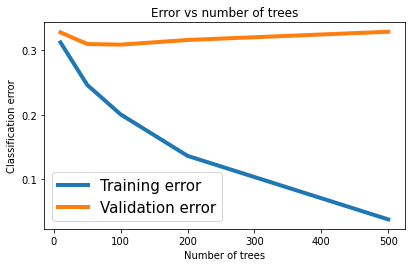

In [98]:
plt.plot([10, 50, 100, 200, 500], training_errors, linewidth=4.0, label='Training error')
plt.plot([10, 50, 100, 200, 500], validation_errors, linewidth=4.0, label='Validation error')

make_figure(dim=(10,5), title='Error vs number of trees',
            xlabel='Number of trees',
            ylabel='Classification error',
            legend='best')